___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [1]:
# 10 cesit datamiz var , 60 bin resim var, 50 bin ile training yapilacak, 10 bin tane teste ayrilmis, 32 ye 32 lik

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

In [4]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
# Checking the shape of one image
X_train[5].shape  #5. X train in shape ine baktik

(32, 32, 3)

In [7]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

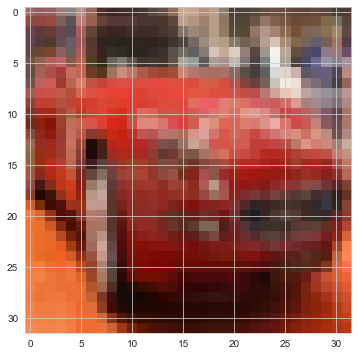

In [8]:
plt.imshow(X_train[5])   #cmap='gray' yazinca bunu gri gösterir
# plt.matshow(X_train[5])

In [9]:
y_train[5]  # 1 nolu resim oldugunu gösteriyor

array([1], dtype=uint8)

In [10]:
y_train.shape   #1 degerimiz dizimiz var, 50 bin tane train imiz var

(50000, 1)

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)  #bu bize y traindeki her bir unique degerden kac tane oldugunu döndürür

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

In [13]:
# pd.Series(y_train.flatten()).value_counts()  #bu da yukaridaki ile ayni sonuc üretir

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# bir liste olusturduk, model calisinca 3 ürettiginde 3 hangi objeye denk geliyor onu görmüs olacagiz

In [15]:
y_train[0]

array([6], dtype=uint8)

In [16]:
classes[6]

'frog'

In [17]:
classes[y_train[0][0]]

'frog'

In [18]:
classes[int(y_train[0])]

'frog'

In [19]:
#int(np.random.randint(low=0, high=50000, size=1))

In [20]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

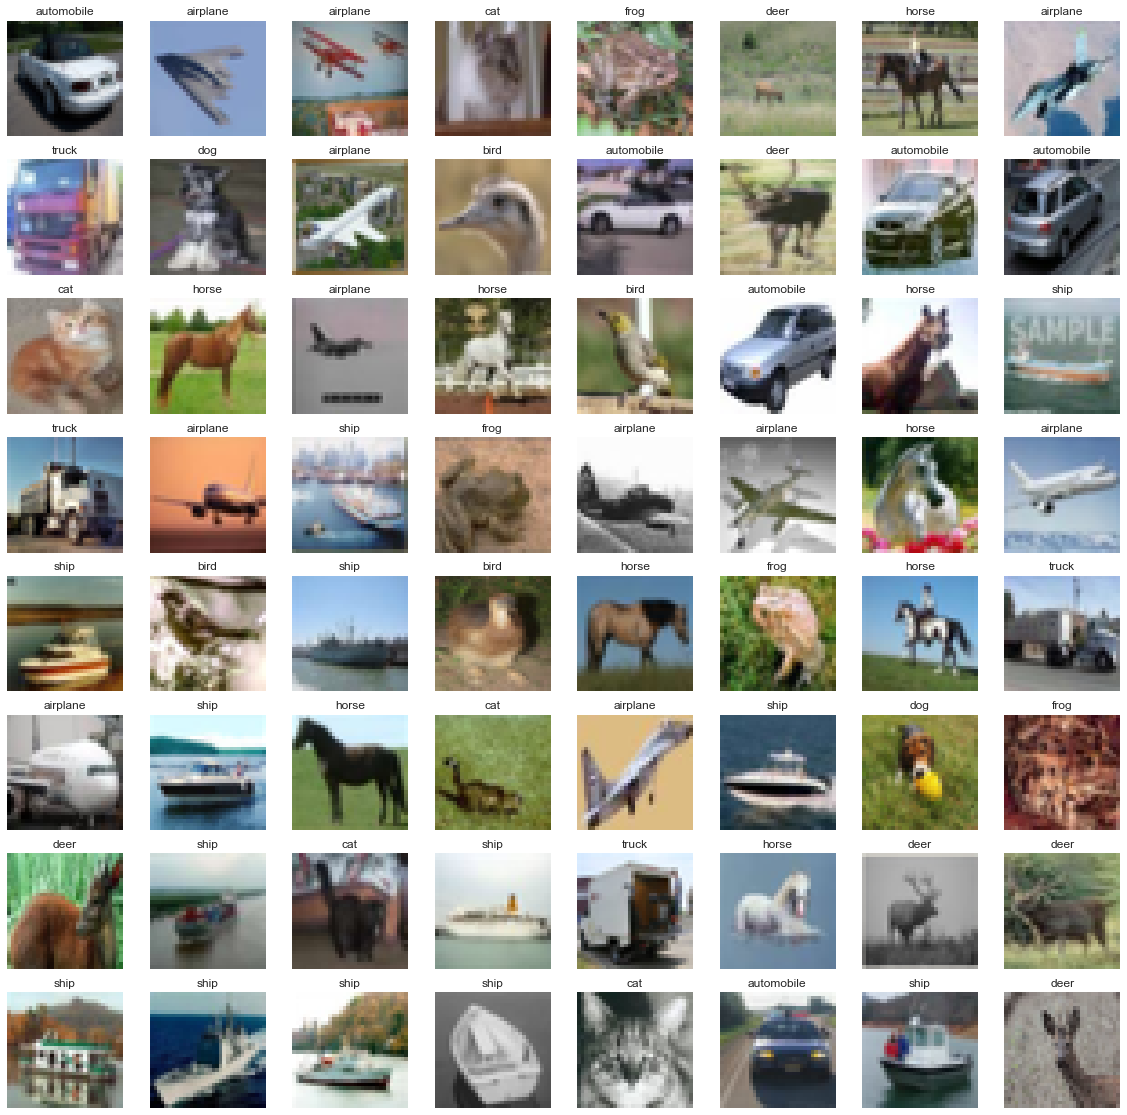

In [21]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))  #0 ile 50 bin arasindan (64 random sectik) bir sayi üretiyor, bunu gösteriyor
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])  #int olarak yaz
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [22]:
X_train[5].min()  #x ve y olarak geldigi icin direkt normalization ile scaling yapmaya baslaniyor
#0 ile 255 arasi ise scaling yapilir, 0 ile 1 arasi ise normalize yapilmiyor

0

In [23]:
X_train[5].max()

252

In [24]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
X_train[5].min()

0.0

In [26]:
X_train[5].max()

0.9882353

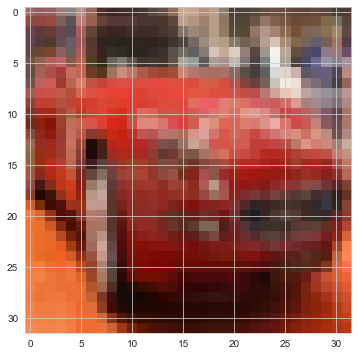

In [27]:
plt.imshow(X_train[5])

In [28]:
X_train.shape, X_test.shape   # 4 ünü de vermek gerekiyor ama burda gerekmedi

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [29]:
y_train   #etiketlenmis data

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [30]:
from tensorflow.keras.utils import to_categorical #hepsini categorical a ceviriyoruz

In [31]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [32]:
Y_train[0]  #dizi haline cevriliyor, bir nevi dummy e dönüsmüs


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [33]:
from tensorflow.keras.models import Sequential  #seq görürsek ardarda gelen anlayacagiz, 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout  #dense fully connected layer anlasilir
#conv2D 2 boyutlu, dropout rasgele aradaki nöronlari bloke ediyor, bunun sonucunu digerine göndermez bloke eder
#dropout un kullanim amaci over fitting i engelleyici yöntem, ya da over fitting icin early stop kullaniriz

In [34]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))#resim 32 ye 32, 3 channel
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu')) #flatten da ilk katman yüksek seciliyor, ilk nöron yüksek sonra huni seklinde kücülüyor
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  #10 cikis var,

model.compile(loss='categorical_crossentropy',   #multi class diye bunu kullandik
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
model.summary()   #ilk katman resim boyutu 32 ye 32, 32 tane pooling var, 896 egitilecek parametre var

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [36]:
#281 bin 322 parametreyi update etmesi gerek

In [37]:
from tensorflow.keras.callbacks import EarlyStopping  #over fitting e hemen gitmesin diye early stop koymak avantaj

In [38]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)
# en iyi val loss degerindeki agirliklari bul döndür diyoruz, default u auto
#early stop tanimlandi modeli fit edebiliriz, 32 lik gruplar halinde getirecek

In [39]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4365 - accuracy: 0.4833 - val_loss: 1.2092 - val_accuracy: 0.5684
Epoch 2/50
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0668 - accuracy: 0.6223 - val_loss: 1.0609 - val_accuracy: 0.6298
Epoch 3/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9248 - accuracy: 0.6736 - val_loss: 0.9407 - val_accuracy: 0.6736
Epoch 4/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8374 - accuracy: 0.7059 - val_loss: 0.9118 - val_accuracy: 0.6850
Epoch 5/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7580 - accuracy: 0.7326 - val_loss: 0.9003 - val_accuracy: 0.6949
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6962 - accuracy: 0.7547 - val_loss: 0.9623 - val_accuracy: 0.6734
Epoch 7/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6387 - accuracy: 0.7740 - val_loss: 0.8879 -

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.437,0.483,1.209,0.568
1,1.067,0.622,1.061,0.630
2,0.925,0.674,0.941,0.674
3,0.837,0.706,0.912,0.685
4,0.758,0.733,0.900,0.695


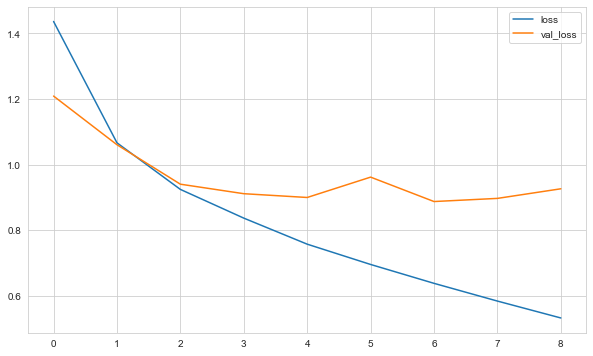

In [42]:
summary[["loss", "val_loss"]].plot();  #bir batch size bitmesi iterasyon, her batch ten sonra update var, baslangicta mavi daha yüksek #
#sonra update edince bir epoch bitiyor val yapiyor sonra hata düsüyor

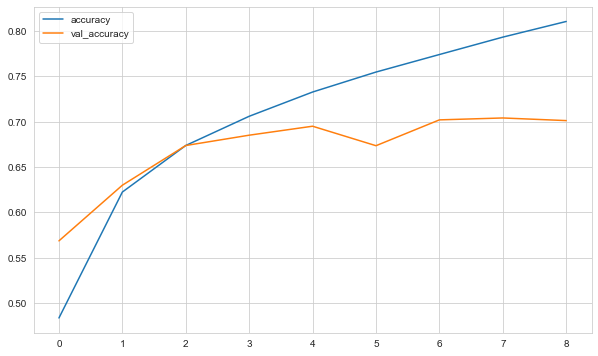

In [43]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.8879 - accuracy: 0.7019


[0.8878883719444275, 0.7019000053405762]

In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8878883719444275
Test accuracy: 0.7019000053405762


In [47]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [48]:
y_pred = np.argmax(pred_prob, axis=1)

In [49]:
y_pred

array([5, 8, 0, ..., 5, 1, 7], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1000
           1       0.75      0.88      0.81      1000
           2       0.63      0.56      0.59      1000
           3       0.56      0.39      0.46      1000
           4       0.65      0.65      0.65      1000
           5       0.55      0.72      0.62      1000
           6       0.77      0.79      0.78      1000
           7       0.77      0.77      0.77      1000
           8       0.87      0.75      0.81      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [51]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [52]:
print(confusion_matrix(y_test, y_pred))

[[775  30  56  16  26   7  11  11  30  38]
 [ 12 877   2   4   6   5   3   4  15  72]
 [ 68  12 563  53  99  81  64  43   7  10]
 [ 31  24  63 389  78 287  64  29  13  22]
 [ 24   6  74  41 650  62  56  75   9   3]
 [ 13   9  45 105  39 722  14  40   6   7]
 [ 11   9  41  43  38  56 785   7   6   4]
 [ 20   7  28  23  55  75  10 766   2  14]
 [ 93  60  14  13  11  13   6   4 752  34]
 [ 48 133  10   6   5  14   8  16  20 740]]


<AxesSubplot:>

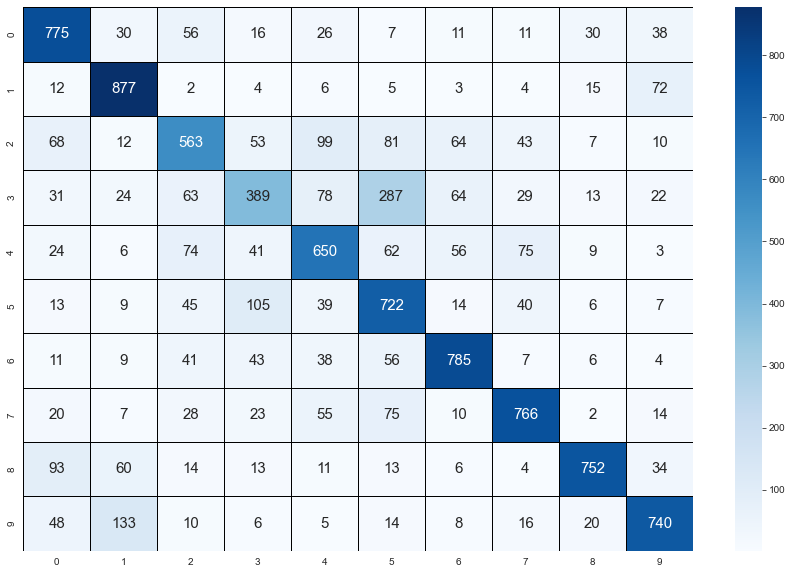

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-2

In [54]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))  #early stop kullanmistik buraya drop out ekledik
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [56]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 114s 72ms/step - loss: 1.4357 - accuracy: 0.4802 - val_loss: 1.0798 - val_accuracy: 0.6262
Epoch 2/50
1563/1563 [==============================] - 117s 75ms/step - loss: 1.0343 - accuracy: 0.6354 - val_loss: 0.9873 - val_accuracy: 0.6518
Epoch 3/50
1563/1563 [==============================] - 119s 76ms/step - loss: 0.9040 - accuracy: 0.6810 - val_loss: 0.8251 - val_accuracy: 0.7196
Epoch 4/50
1563/1563 [==============================] - 121s 77ms/step - loss: 0.8201 - accuracy: 0.7114 - val_loss: 0.7997 - val_accuracy: 0.7253
Epoch 5/50
1563/1563 [==============================] - 140s 89ms/step - loss: 0.7656 - accuracy: 0.7313 - val_loss: 0.7524 - val_accuracy: 0.7376
Epoch 6/50
1563/1563 [==============================] - 110s 71ms/step - loss: 0.7215 - accuracy: 0.7476 - val_loss: 0.7347 - val_accuracy: 0.7465
Epoch 7/50
1563/1563 [==============================] - 119s 76ms/step - loss: 0.6819 - accuracy: 0.7583 - val_loss: 0

In [57]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.436,0.480,1.080,0.626
1,1.034,0.635,0.987,0.652
2,0.904,0.681,0.825,0.720
3,0.820,0.711,0.800,0.725
4,0.766,0.731,0.752,0.738


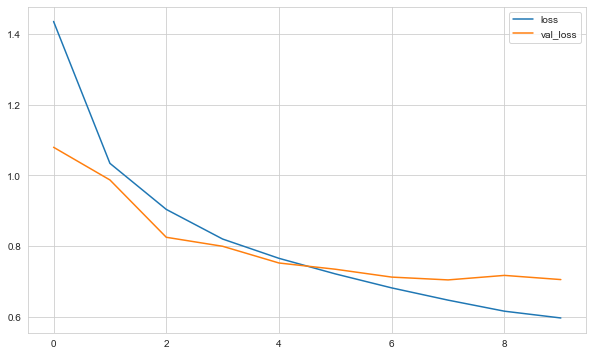

In [58]:
summary[["loss", "val_loss"]].plot();

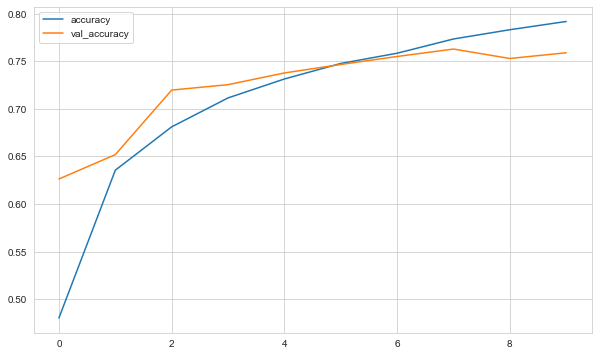

In [59]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [60]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.7045 - accuracy: 0.7627


[0.7045401930809021, 0.7627000212669373]

In [61]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7045401930809021
Test accuracy: 0.7627000212669373


In [62]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 5s 14ms/step


In [63]:
y_pred = np.argmax(pred_prob, axis=1)

In [64]:
y_pred

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1000
           1       0.89      0.88      0.88      1000
           2       0.72      0.61      0.66      1000
           3       0.67      0.46      0.55      1000
           4       0.64      0.80      0.71      1000
           5       0.68      0.68      0.68      1000
           6       0.74      0.87      0.80      1000
           7       0.85      0.79      0.82      1000
           8       0.77      0.92      0.84      1000
           9       0.87      0.83      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



<AxesSubplot:>

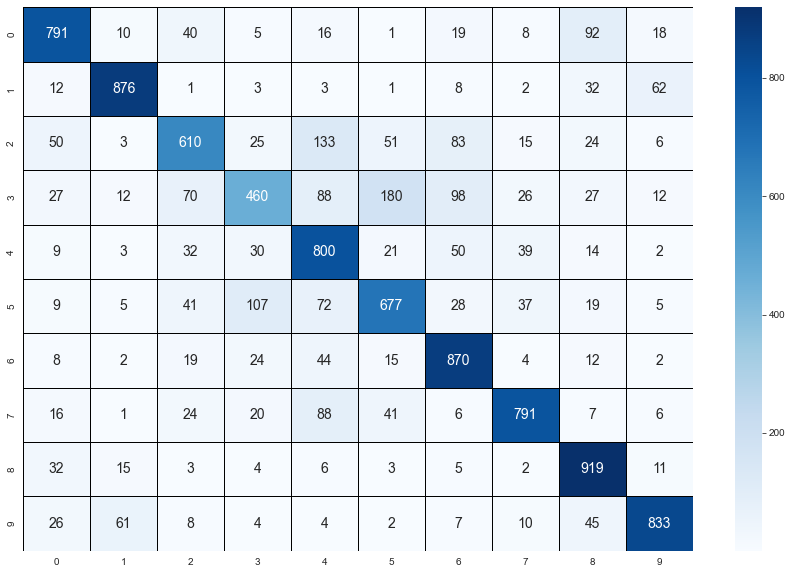

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [67]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [68]:
from tensorflow.keras.layers import BatchNormalization
# her bir batch ten sonra sonuclar normalize ediliyor, mean i cikarma hepsini 0 a cekmek demek
#learnin process i stabilize ediyor

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [69]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [71]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 219s 139ms/step - loss: 1.9063 - accuracy: 0.3094 - val_loss: 2.1635 - val_accuracy: 0.2596
Epoch 2/50
1563/1563 [==============================] - 210s 134ms/step - loss: 1.4501 - accuracy: 0.4776 - val_loss: 1.3922 - val_accuracy: 0.5209
Epoch 3/50
1563/1563 [==============================] - 219s 140ms/step - loss: 1.2445 - accuracy: 0.5689 - val_loss: 1.0244 - val_accuracy: 0.6408
Epoch 4/50
1563/1563 [==============================] - 213s 137ms/step - loss: 1.1153 - accuracy: 0.6173 - val_loss: 1.0405 - val_accuracy: 0.6343
Epoch 5/50
1563/1563 [==============================] - 207s 132ms/step - loss: 1.0282 - accuracy: 0.6541 - val_loss: 0.8716 - val_accuracy: 0.6884
Epoch 6/50
1563/1563 [==============================] - 205s 131ms/step - loss: 0.9525 - accuracy: 0.6813 - val_loss: 0.7450 - val_accuracy: 0.7422
Epoch 7/50
1563/1563 [==============================] - 204s 130ms/step - loss: 0.8909 - accuracy: 0.7055 - val_

In [72]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.906,0.309,2.163,0.260
1,1.450,0.478,1.392,0.521
2,1.244,0.569,1.024,0.641
3,1.115,0.617,1.041,0.634
4,1.028,0.654,0.872,0.688


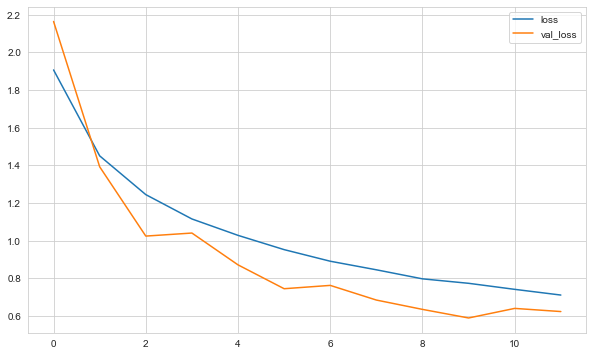

In [73]:
summary[["loss", "val_loss"]].plot();

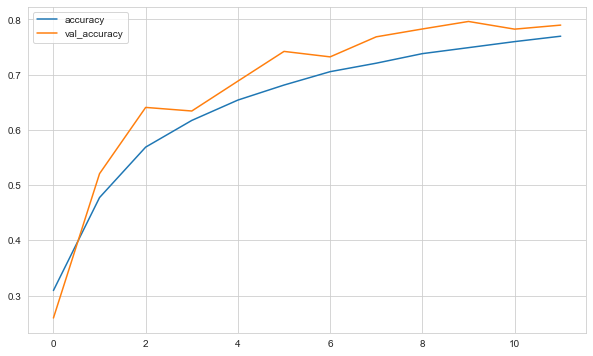

In [74]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [75]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 10s 32ms/step - loss: 0.5898 - accuracy: 0.7964


[0.5897510051727295, 0.7964000105857849]

In [76]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5897510051727295
Test accuracy: 0.7964000105857849


In [77]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 10s 31ms/step


In [78]:
y_pred = np.argmax(pred_prob, axis=1)

In [79]:
y_pred

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.92      0.88      0.90      1000
           2       0.73      0.69      0.71      1000
           3       0.66      0.59      0.62      1000
           4       0.77      0.79      0.78      1000
           5       0.71      0.67      0.69      1000
           6       0.84      0.87      0.85      1000
           7       0.84      0.84      0.84      1000
           8       0.79      0.94      0.86      1000
           9       0.85      0.88      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.79      0.80      0.79     10000
weighted avg       0.79      0.80      0.79     10000



<AxesSubplot:>

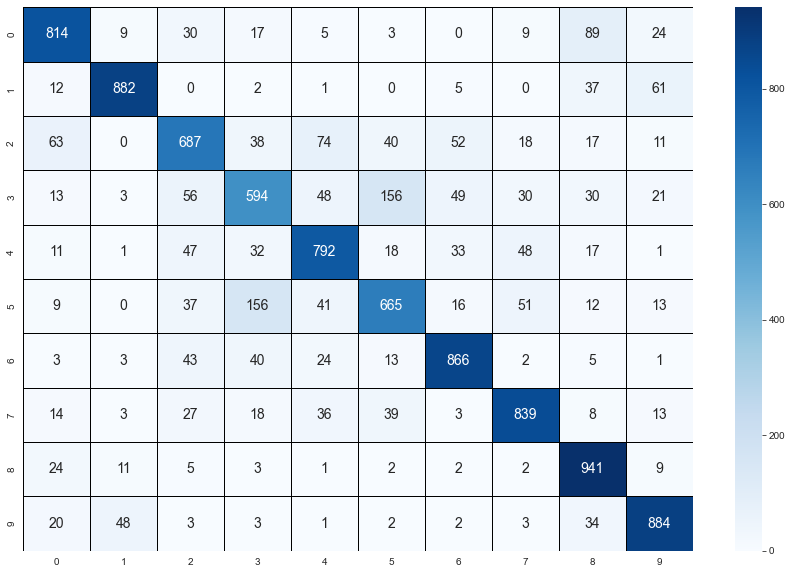

In [81]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [82]:
my_image = X_test[44]

In [83]:
my_image.shape

(32, 32, 3)

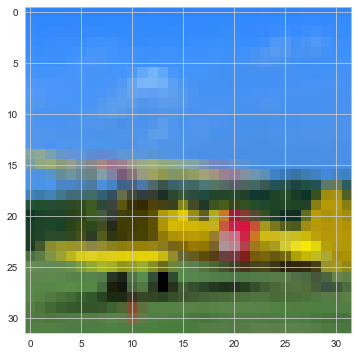

In [84]:
plt.imshow(my_image)

In [85]:
image_prediction = model.predict(my_image.reshape(1,32,32,3)) #basina kac resim oldugunu girmemiz gerek, 32 ye 32 lik 3 channel

1/1 [==============================] - 0s 25ms/step


In [86]:
image_prediction   #softmax ten dolayi 0 ile 1 arasinda degerler üretiyor

array([[9.9515861e-01, 1.7145737e-04, 8.0168562e-04, 7.2631068e-05,
        1.7883000e-04, 1.7936467e-05, 1.6223099e-05, 1.5213246e-04,
        1.9637786e-03, 1.4667871e-03]], dtype=float32)

In [87]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [88]:
result=np.argmax(image_prediction, axis=1)

In [89]:
result

array([0], dtype=int64)

In [90]:
classes[int(result)]

'airplane'

In [91]:
model.save("cnn-1.h5")

In [92]:
#finished

In [93]:
model=tf.keras.models.load_model('cnn-1.h5')   #import yapmadik load yapip modeli cagirdik

In [94]:
X_test[15].shape

(32, 32, 3)

In [95]:
np.expand_dims(X_test[15],axis=0).shape   #reshape ile expand dimension bir boyut ekliyor

(1, 32, 32, 3)

In [96]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

1/1 [==============================] - 0s 213ms/step


In [97]:
np.argmax(pred)

8

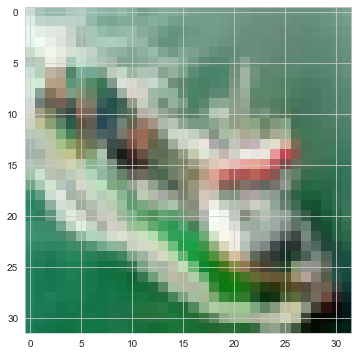

In [98]:
plt.imshow(X_test[15])

In [99]:
classes[8]

'ship'